In [7]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from game import game
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
import scipy.stats

In [3]:
from distfit import distfit
dist = distfit(method='discrete')
# print(distfit.__version__)

# Monte Carlo Method

In [30]:
def run_sim(trials = 10000, run_seed = 12345678, x_bins=100):
    cycles = []
    for i in range(trials):
        cycles.append(game())

    results = pd.DataFrame(cycles, columns=["cycles", "winner"])
    results.to_csv("t"+str(trials)+"_s"+str(run_seed)+"results.csv", index=False)
    results.head(5)
    results_grouped = results.groupby("cycles", as_index=False).count()
    results_grouped.columns = ["cycles", "count"]
    results_grouped.head(5)
    fig, axes = plt.subplots(figsize=(10, 5))
    axes.bar(results_grouped["cycles"], height=results_grouped["count"])
    plt.title('Output with '+ str(trials) + ' Trials')
    plt.xlabel('cycles')
    plt.ylabel('values')
    
    # Show graph
    plt.show()
    expected_cycles = results["cycles"].mean()
    print("Expected number of cycles for " + str(trials)+" trials : ", expected_cycles)   
    f = Fitter(results["cycles"].values,
           distributions= get_common_distributions(), bins=x_bins)
    f.fit()
    # f.summary()
    

    # from distfit import distfit
    # dist = distfit(method='discrete')
    # dist.fit_transform(results["cycles"].values, verbose=0)
    # print(dist.summary)
    # dist.plot()
    # plt.show()
    # dist.plot_summary()
    # plt.show() 
    
    return results, results_grouped, f

## Simulate 10,000 runs

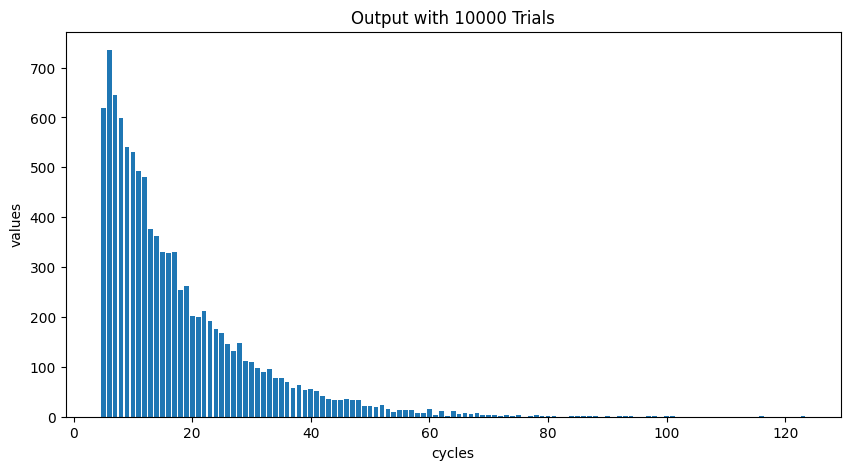

Expected number of cycles for 10000 trials :  17.3386


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.47it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.003206,1378.835781,-149503.451844,inf,0.066035,2.343612e-38
expon,0.004151,1462.894882,-146929.532117,inf,0.061900,9.429532e-34
exponpow,0.004754,1833.060833,-145563.197562,inf,0.113964,1.358038e-113
gamma,0.006204,1574.731624,-142902.117796,inf,0.179167,2.545017e-281
lognorm,0.006647,1319.046313,-142211.678866,inf,0.059616,2.451627e-31


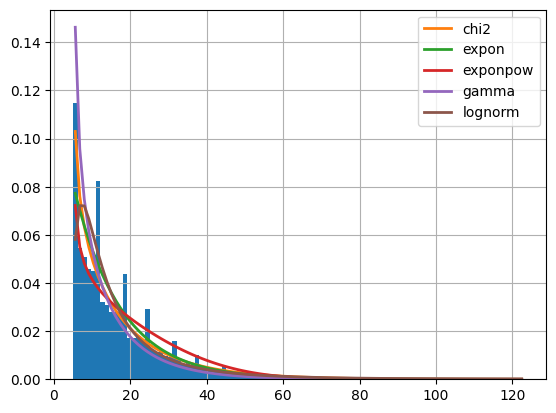

In [120]:
results, results_grouped, f = run_sim( trials=10000, run_seed=12345678)
# f.hist()
f.summary()

In [4]:
    # from distfit import distfit
    # dist = distfit(distr='geom')#['binom','nbinom','poisson','geom'])#method='discrete'
    # dist.fit_transform(results["cycles"])
    # print(dist.summary)
    # dist.plot()
    # plt.show();
    

## Fitting Discrete Distributions

### Fitting Poisson

  params: FitParams(mu=17.420394140360695, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'


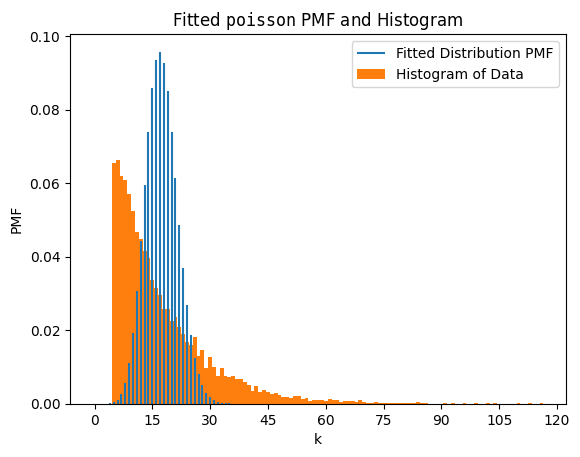

In [105]:
import scipy.stats
dist = scipy.stats.poisson
bounds = [(1,120)]
res = scipy.stats.fit(dist, results["cycles"],bounds)
print(res)
res.plot();

### Binomial

  params: FitParams(n=492.0, p=0.03524105339986808, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'


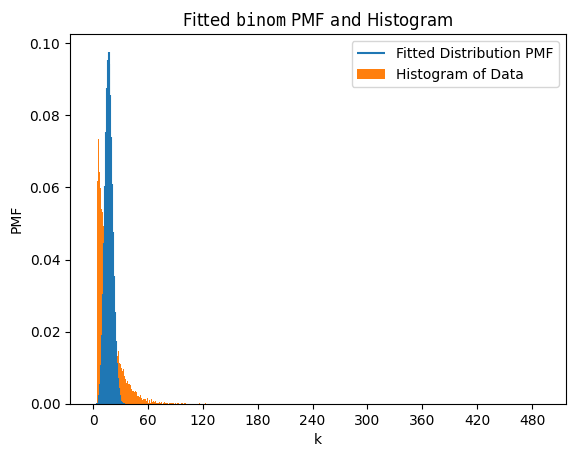

In [121]:
res = scipy.stats.fit(scipy.stats.binom, results["cycles"],bounds = [(1,500),(0,1)])
print(res)
res.plot();

### Fitting Geometric

  params: FitParams(p=0.07460945919516587, loc=4.0)
 success: True
 message: 'Optimization terminated successfully.'


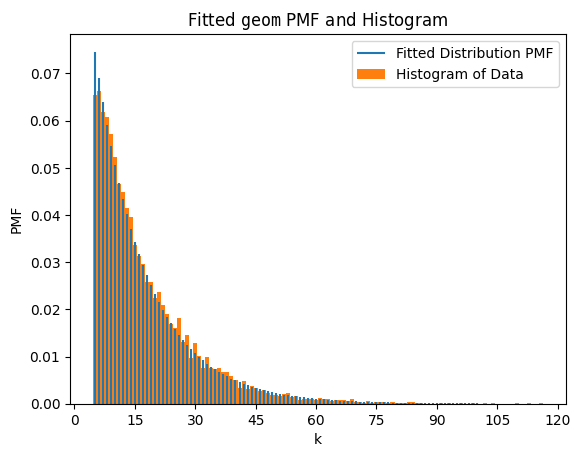

In [111]:
res = scipy.stats.fit(scipy.stats.geom, results["cycles"],bounds = [(0,1),(0,10)])
print(res)
res.plot();

#### Find mean, Variance, Skewness and kurtosis

In [96]:
results["cycles"].min(), results["cycles"].max()
mean, var, skew, kurt = scipy.stats.geom.stats(0.08044530074000428, moments='mvsk')
mean, var, skew, kurt

(5, 116)

(12.43080690607344, 142.09415343000967, 2.0017586236188807, 6.007037587232556)

### Fit negative binomial

  params: FitParams(n=3.0, p=0.14691856936701164, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'


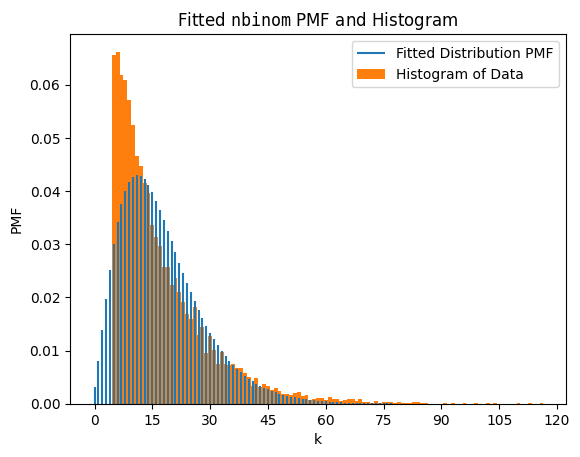

In [84]:
# scipy.stats.rv_discrete
res = scipy.stats.fit(dist=scipy.stats.nbinom, data=results["cycles"], bounds=[(1,100),(0,1)])
print(res)
res.plot();

## Rune 1,000,000 Simulation

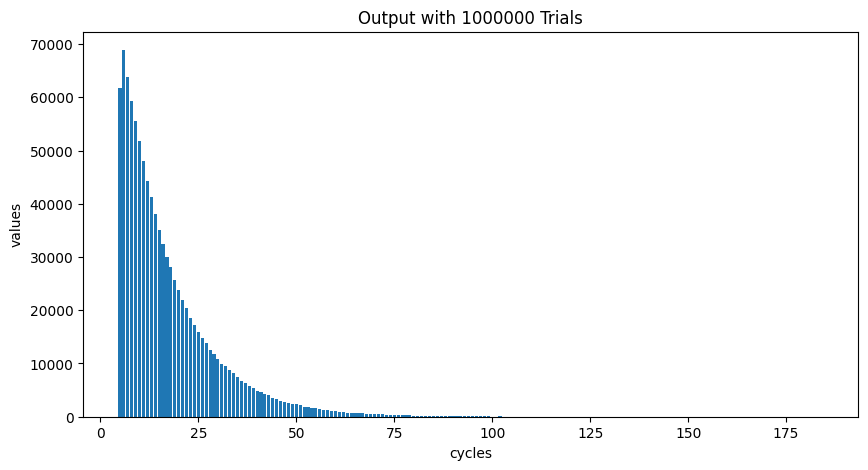

Expected number of cycles for 1000000 trials :  17.543026


Fitting 10 distributions: 100%|██████████| 10/10 [00:30<00:00,  3.00s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000575,1936.920812,-2.127579e+07,inf,0.061819,0.0
gamma,0.000851,1952.463840,-2.088505e+07,inf,0.066815,0.0
cauchy,0.005529,1535.869704,-1.901329e+07,inf,0.202662,0.0
rayleigh,0.005849,4718.372057,-1.895693e+07,inf,0.163356,0.0
powerlaw,0.007277,1216.159225,-1.873848e+07,inf,0.315869,0.0


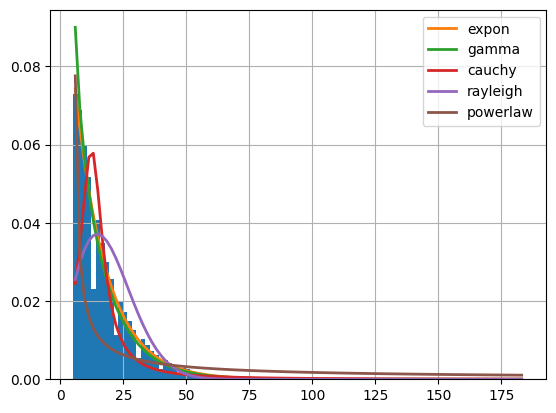

In [113]:
results, results_grouped, f = run_sim( trials=1000000, run_seed=12345678, x_bins=100)
f.summary()

### Fit Geometric

  params: FitParams(p=0.07383874030289977, loc=4.0)
 success: True
 message: 'Optimization terminated successfully.'


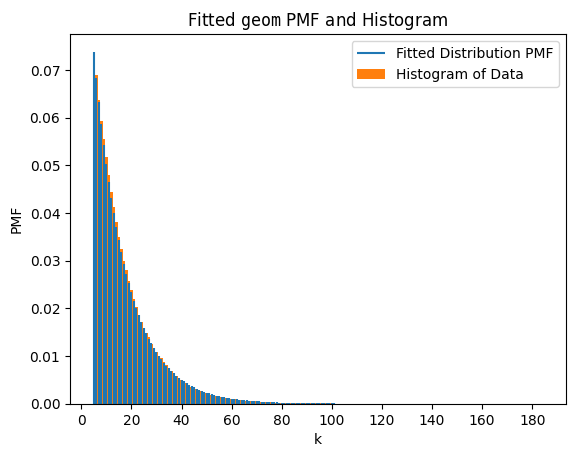

In [115]:
res = scipy.stats.fit(scipy.stats.geom, results["cycles"],bounds = [(0,1),(0,10)])
print(res)
res.plot();

## Simulate 10,000,000 Trials

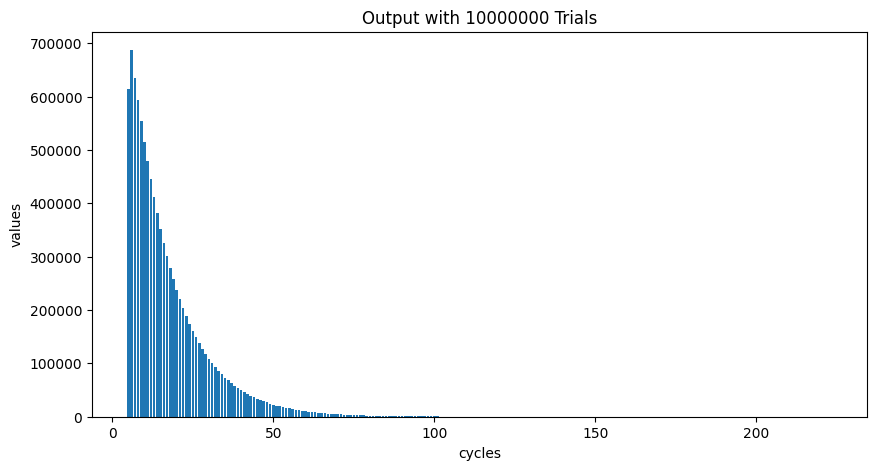

Expected number of cycles for 10000000 trials :  17.5392024


Fitting 10 distributions:  50%|█████     | 5/10 [00:30<00:44,  8.96s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED exponpow distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
SKIPPED powerlaw distribution (taking more than 30 seconds)
Fitting 10 distributions: 100%|██████████| 10/10 [00:30<00:00,  3.00s/it]
cauchy was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000547,2248.319567,-2.362896e+08,inf,0.061512,0.0
rayleigh,0.005333,6740.088100,-2.135198e+08,inf,0.162662,0.0
norm,0.006711,8829.330736,-2.112205e+08,inf,0.163099,0.0
uniform,0.017085,1080.899013,-2.018762e+08,inf,0.778618,0.0
cauchy,inf,inf,inf,inf,NaN,NaN


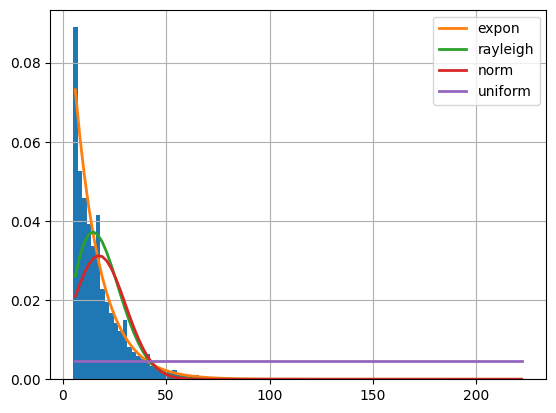

In [116]:
results, results_grouped, f= run_sim( trials=10000000, run_seed=12345678)
f.summary()

### Fit Geometric Distribution

  params: FitParams(p=0.0738595957145617, loc=4.0)
 success: True
 message: 'Optimization terminated successfully.'


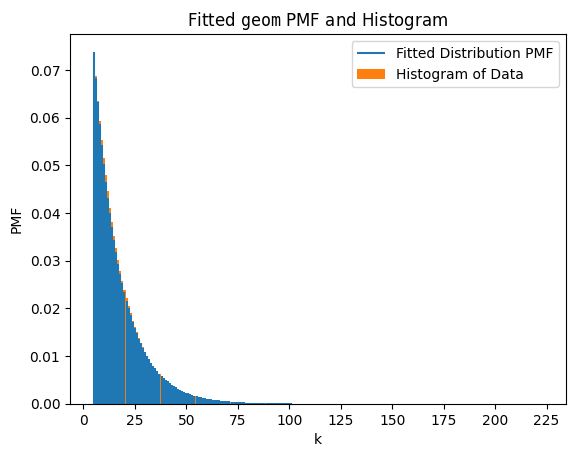

In [117]:
res = scipy.stats.fit(scipy.stats.geom, results["cycles"],bounds = [(0,1),(0,10)])
print(res)
res.plot();

# Markov Chain Implementation

In [5]:
from markov_chain_game import MarkovChainGame

chain = MarkovChainGame(A_start=4, B_start=4, pot=2)
simulation = chain.compute_probabilities(100)
simulation.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.062, 0.069, 0.064, 0.059,
       0.055, 0.052, 0.048, 0.044, 0.041, 0.038, 0.035, 0.033, 0.03 ,
       0.028, 0.026, 0.024, 0.022, 0.02 , 0.019, 0.017, 0.016, 0.015,
       0.014, 0.013, 0.012, 0.011, 0.01 , 0.009, 0.009, 0.008, 0.007,
       0.007, 0.006, 0.006, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004,
       0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [13]:
import random

random.seed(10)
simulation = chain.compute_probabilities(100)
simulation.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.062, 0.069, 0.064, 0.059,
       0.055, 0.052, 0.048, 0.044, 0.041, 0.038, 0.035, 0.033, 0.03 ,
       0.028, 0.026, 0.024, 0.022, 0.02 , 0.019, 0.017, 0.016, 0.015,
       0.014, 0.013, 0.012, 0.011, 0.01 , 0.009, 0.009, 0.008, 0.007,
       0.007, 0.006, 0.006, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004,
       0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

<BarContainer object of 101 artists>

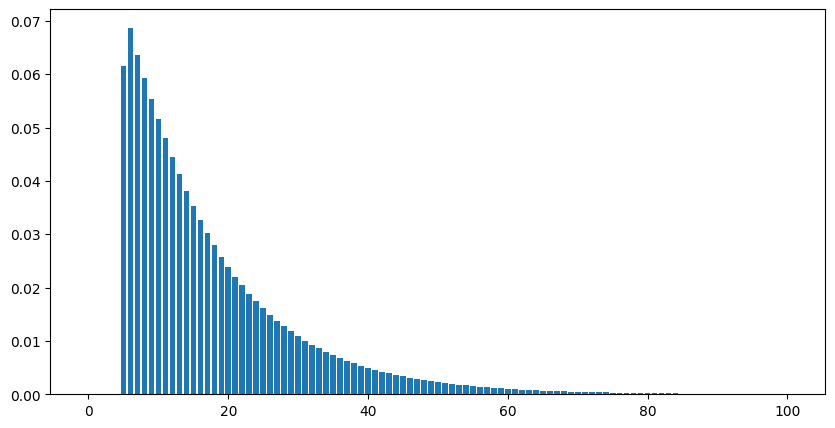

In [15]:
fig, axes = plt.subplots(figsize=(10, 5))
axes.bar(np.arange(len(simulation) ), height=simulation)
plt.show()